In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

If pyrolite is not installed run:

```
!pip install --upgrade pyrolite
```

In [53]:
from pyrolite.plot import pyroplot

## Import all of the data

In [104]:
all_data = pd.read_csv('../data/U_Pb/Compiled_Data.csv')

#There is one inherited grain in IR22-1 that needs to be dropped
all_data = te_data[te_data['Analysis']!='IR22-1 S 18']

all_data.columns

Index(['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U', '206Pb_cps',
       '206Pb_204Pb', '206Pb_204Pb_1s', '208Pb_232Th', '208Pb_232Th_2s',
       '207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.', '238U_206Pb', '238U_206Pb_2s', '207Pb_206Pb',
       '207Pb_206Pb_2s', '208Pb_232Th_date', '208Pb_232Th_2s_(Ma)',
       '208Pb_232Th_2s-sys_(Ma)', '207Pb_206Pb_date', '207Pb_206Pb_2s_(Ma)',
       '207Pb_206Pb_2s-sys_(Ma)', '207Pb_235U_date', '207Pb_235U_2s_(Ma)',
       '207Pb_235U_2s-sys_(Ma)', '206Pb_238U_date', '206Pb_238U_2s_(Ma)',
       '206Pb_238U_2s-sys_(Ma)', '7/6 disc._(%)', 'disc._(%)', '2s_(%)', 'P',
       'Ti', 'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', '?REE', '(Gd/Yb)cn', 'Lu/Hf',
       'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb',
       'Experiment', 'Notes'],
      dtyp

## Export the data for plotting in isoplotr

In [110]:
isoplotr_data = all_data[['Sample','207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.']]
isoplotr_data = isoplotr_data[(isoplotr_data['Sample'] == 'BM22-1') | (isoplotr_data['Sample'] == 'IR22-1') ]

In [112]:
isoplotr_data.to_csv('../data/U_Pb/isoplotr_data.csv', index=False)

In [115]:
te_data  = all_data[['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U','P',
       'Ti', 'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', '?REE', '(Gd/Yb)cn', 'Lu/Hf',
       'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb']]
te_data.head()

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,?REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb
0,BM22-1,BM22-1 L 43,970,695.0,2.080,0.717,587.0,8.01,8782.0,NaN,8.18,0.100,23.80,1.120,21.500,48.00,2.650,249.0,82.80,894.0,321.0,1304.0,247.0,2043.0,344.0,4708.0,2.270,695.0,970.0,774.0,17.52,0.07,5580.69,0.10,0.07,3.60,0.01,0.01,0.72,0.08,0.54,0.004,0.475
1,BM22-1,BM22-1 L 44,1161,1077.0,2.550,0.928,592.0,5.39,10465.0,NaN,12.20,0.296,64.00,1.500,28.000,52.90,4.640,289.0,93.80,1063.0,371.0,1521.0,290.0,2342.0,396.0,4404.0,3.220,1077.0,1161.0,736.0,23.57,0.11,6516.43,0.10,0.09,3.79,0.01,0.01,0.93,0.10,0.42,0.005,0.496
2,BM22-1,BM22-1 L 45,1605,1043.0,3.460,0.650,611.0,7.42,9618.0,NaN,7.97,0.116,24.40,1.180,20.700,44.50,2.320,255.0,83.70,970.0,358.0,1415.0,273.0,2313.0,390.0,4913.0,2.110,1043.0,1605.0,766.0,16.09,0.07,6151.22,0.09,0.08,3.77,0.00,0.01,0.65,0.11,0.51,0.003,0.694
3,BM22-1,BM22-1 L 46,442,160.0,0.883,0.362,248.0,3.79,1187.0,NaN,2.69,0.116,7.04,0.083,2.070,3.18,0.059,23.2,7.81,103.0,41.8,194.0,41.0,366.0,68.2,5741.0,1.370,160.0,442.0,705.0,17.58,0.02,857.26,0.05,0.01,1.96,0.01,0.02,0.36,0.13,4.84,0.007,1.207
4,BM22-1,BM22-1 L 48,192,55.5,0.449,0.289,173.0,3.70,762.0,NaN,1.31,NaN,3.23,0.005,0.575,1.54,0.247,10.9,4.36,63.0,25.8,124.0,29.3,272.0,51.6,6035.0,0.852,55.5,192.0,703.0,660.88,0.18,586.85,0.03,0.01,1.54,0.01,0.02,0.29,0.07,7.92,0.005,0.705


## Comparisons to make

- Eu* anomaly
- U/Yb vs Nb/Yb
- Ti in zircon (zircon crystallization)
- Multivariate comparison between the datasets

In [117]:
color_1, color_2, color_3, color_4 = sns.color_palette('vlag', 4)
color_1

(0.52753571, 0.62574126, 0.77013939)

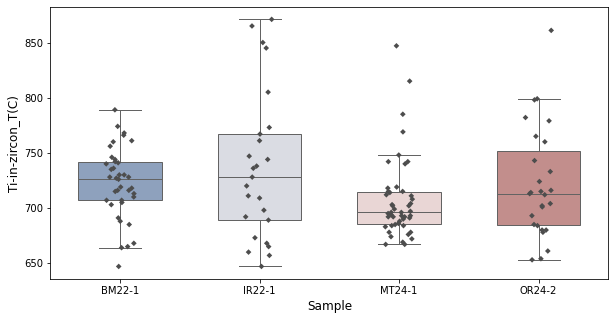

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
              size=4, color=".3", linewidth=0)
plt.show()

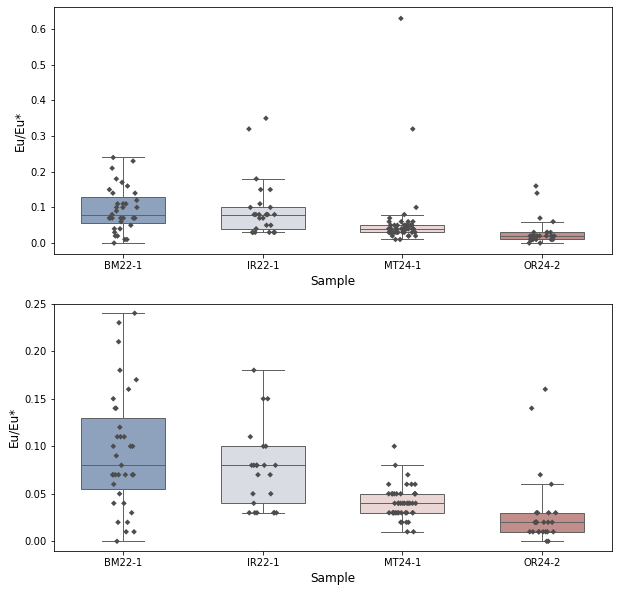

In [129]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.boxplot(x='Sample',y='Eu/Eu*',data=te_data, width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Eu/Eu*',data=te_data,
              size=4, color=".3", linewidth=0)
plt.subplot(2,1,2)
sns.boxplot(x='Sample',y='Eu/Eu*',data=te_data, width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Eu/Eu*',data=te_data,
              size=4, color=".3", linewidth=0)
plt.ylim(-0.01,0.25)
plt.show()

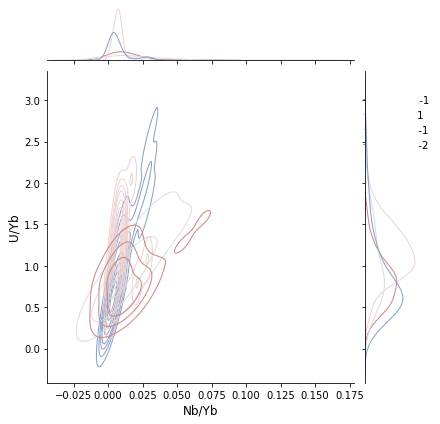

In [120]:
sns.jointplot(
    data=te_data,
    x="Nb/Yb", y="U/Yb", hue="Sample",
    kind="kde", palette="vlag")

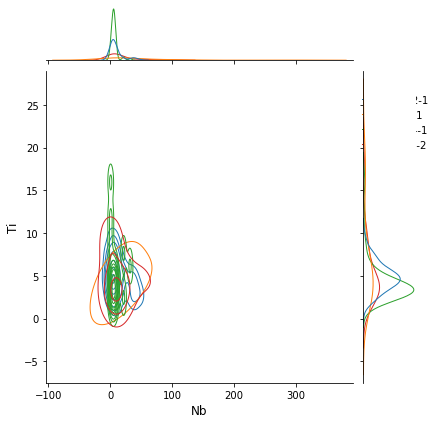

In [121]:
jp = sns.jointplot(
    data=te_data,
    x="Nb", y="Ti", hue="Sample",
    kind="kde")

/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:256: RuntimeWarning: divide by zero encountered in log10
  logmin, logmax = np.log10(_ymin), np.log10(_ymax)
/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:262: RuntimeWarning: invalid value encountered in double_scalars
  np.floor(10 ** (logmin - 0.05 * logy_rng) / low) * low,
/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:256: RuntimeWarning: divide by zero encountered in log10
  logmin, logmax = np.log10(_ymin), np.log10(_ymax)
/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:262: RuntimeWarning: invalid value encountered in double_scalars
  np.floor(10 ** (logmin - 0.05 * logy_rng) / low) * low,
/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:256: RuntimeWarning: divide by zero encountered in log10
  logmin, logmax = np.log10(_ymin), np.log10(_ymax)
/Users/unimos/opt/anaconda3

(0.001, 5000)

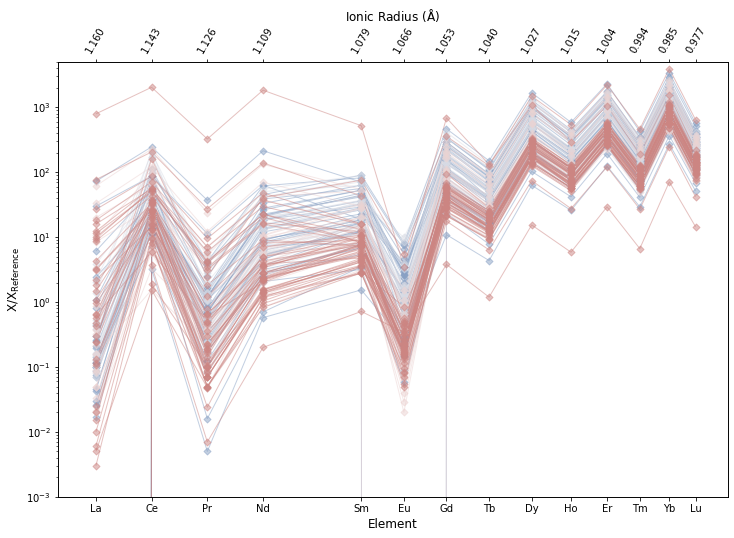

In [122]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(12, 8))

te_data_BM22 = te_data[te_data['Sample'] == 'BM22-1']
te_data_IR22 = te_data[te_data['Sample'] == 'IR22-1']
te_data_OR24 = te_data[te_data['Sample'] == 'OR24-2']
te_data_MT24 = te_data[te_data['Sample'] == 'MT24-1']

te_data_BM22.pyroplot.REE(ax=ax,color=color_1,alpha=0.5)
te_data_IR22.pyroplot.REE(ax=ax,color=color_2,alpha=0.5)
te_data_OR24.pyroplot.REE(ax=ax,color=color_3,alpha=0.5)
te_data_MT24.pyroplot.REE(ax=ax,color=color_4,alpha=0.5)
ax.set_ylim(.001, 5000)
